In [9]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [10]:
df = pd.read_csv("2024-04-18_01-09-26/predictions.csv")

In [11]:
df

,pred_00,target_00,test,train,val
0,-0.618911,0.342556,0.0,1.0,0.0
1,1.220341,0.323402,0.0,1.0,0.0
2,0.039957,-0.086744,0.0,1.0,0.0
3,-0.172993,0.409176,0.0,1.0,0.0
4,-0.111020,-0.979089,0.0,1.0,0.0
...,...,...,...,...,...
3604,0.629470,0.339032,1.0,0.0,0.0
3605,-0.788680,-0.979089,1.0,0.0,0.0
3606,0.811958,1.075125,1.0,0.0,0.0
3607,0.435137,1.540047,1.0,0.0,0.0


In [18]:
xx = np.arange(-1,2,0.01)

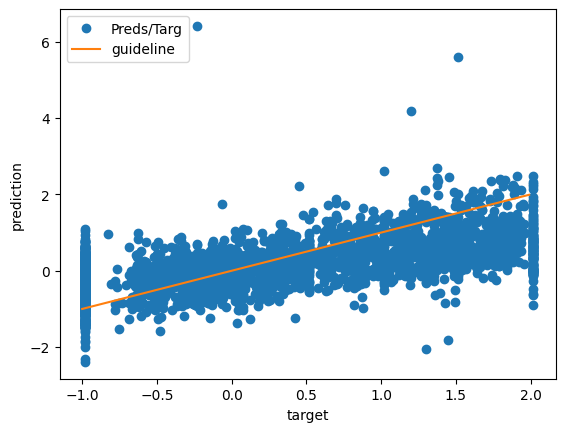

In [23]:
plt.plot(df['target_00'],df['pred_00'],'o')
plt.plot(xx,xx)
plt.ylabel("prediction")
plt.xlabel("target")
plt.legend(['Preds/Targ','guideline'])


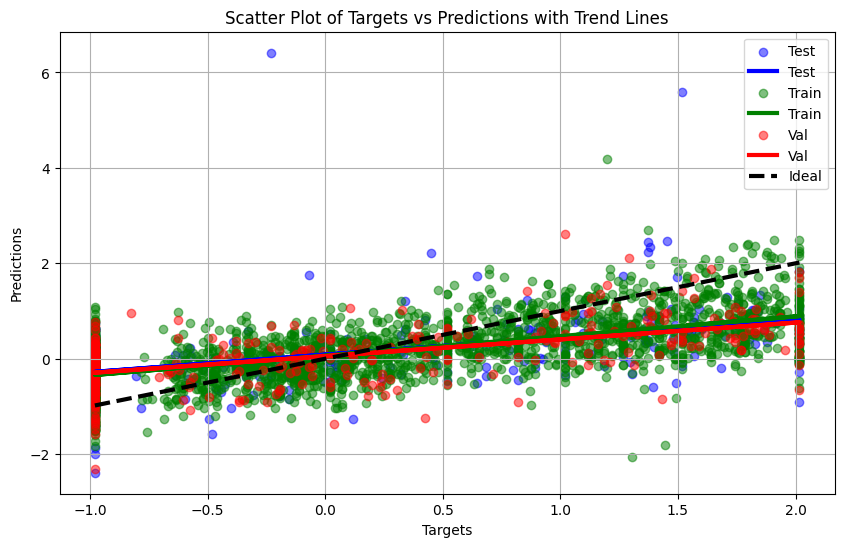

In [40]:
conditions = [
    (df['test'] == 1.0),
    (df['train'] == 1.0),
    (df['val'] == 1.0)
]
choices = ['blue', 'green', 'red']  # Test: Blue, Train: Green, Val: Red
df['color'] = np.select(conditions, choices, default='black')

# Plotting
plt.figure(figsize=(10, 6))
groups = df.groupby('color')
for color, group in groups:
    plt.scatter(group['target_00'], group['pred_00'], label=f"{color} data", color=color,alpha=0.5)
    # Linear regression
    if len(group) > 1:  # We need at least two points to fit a line
        m, b = np.polyfit(group['target_00'], group['pred_00'], 1)
        plt.plot(group['target_00'], m*group['target_00'] + b, color=color, label=f'{color} trend',linewidth=3)

# Ideal case line
x_values = np.array([df['target_00'].min(), df['target_00'].max()])
plt.plot(x_values, x_values, label='Ideal line', linestyle='--', color='black',linewidth=3)

plt.title('Scatter Plot of Targets vs Predictions with Trend Lines')
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.legend(['Test','Test',"Train","Train","Val","Val","Ideal"])
plt.grid(True)
plt.show()